This notebook shows how to implement a simple feedforward neural network in PyTorch. 

You can re-use and adapt this code for your project.

In [35]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import Sequential, Linear, ReLU

from tqdm import tqdm

import matplotlib.pyplot as plt

In [37]:
# Check if GPU is available
import torch
print(torch.cuda.is_available())  # Should print True if CUDA is available
print(torch.cuda.current_device())  # Should print the current GPU device id (e.g., 0)

False


AssertionError: Torch not compiled with CUDA enabled

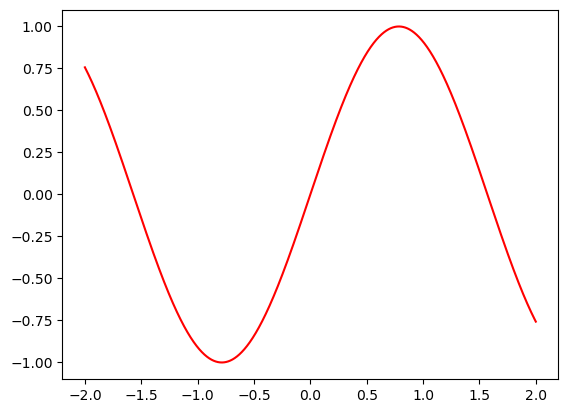

In [21]:
### Synthetic dataset generation

# Let's generate a simple sinusoidal dataset
n_samples = 10000
X = torch.linspace(-2., 2., n_samples).reshape(-1, 1)
y = torch.sin(2*X)

# Create a PyTorch Dataset object from tensor data
dataset = TensorDataset(X, y)

# Plot function to learn
plt.plot(X, y, 'r-')
plt.show()

In [23]:
### Model implementation

# Number of neurons in hidden layers
nh1 = 32 # first hidden layer
nh2 = 32 # second hidden layer

# Create a feedforward neural network as a Sequential object by composing individual layers
network = Sequential(Linear(1, nh1),
                     ReLU(),
                     Linear(nh1, nh2),
                     ReLU(),
                     Linear(nh2, 1))

In [25]:
### Prepare for training

# Define training hyperparameters
n_epochs = 100
lr = 1e-2
batch_size = 1000
milestones = [75]

#Define loss and optimizer
criterion = model_nn.
optimizer = torch.optim.Adam(network.parameters(), lr=lr)

# Instantiate a scheduler to decrease the learning rate during training according to a pre-defined rule
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.1)

# Create a batch loader from the dataset
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.46it/s, loss=3.04e-5]


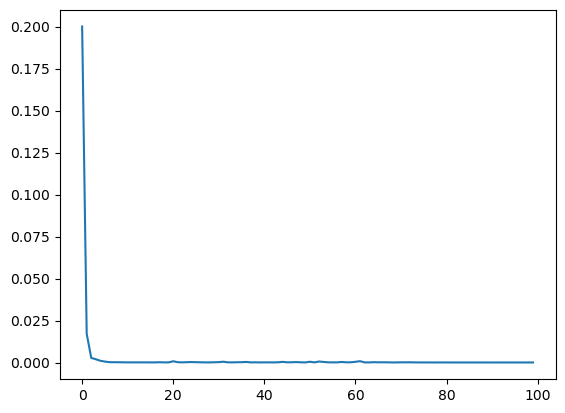

In [27]:
### Training

losses = []
training_loop = tqdm(range(n_epochs)) 
for epoch in training_loop:
    
    # At each epoch iterate over batches
    for X_batch, y_batch in loader:
        # compute training loss on batch
        loss = torch.mean((network(X_batch) - y_batch)**2)
        # compute gradient of training loss wrt parameters
        loss.backward()
        # do one gradient step
        optimizer.step()
        # reset the computational graph        
        optimizer.zero_grad()
        
    
    # Print loss in the progression bar
    training_loop.set_postfix(loss = loss.item())
    
    # decrease learning rate according to scheduler's settings
    scheduler.step()

    # save training loss for plotting
    losses.append(loss.item())

plt.plot(losses, label='Training loss')
plt.show()


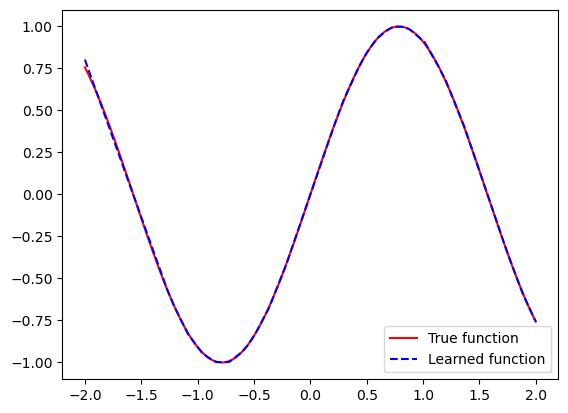

In [6]:
plt.plot(X, y, 'r-', label='True function')
plt.plot(X, network(X).detach(), 'b--', label = 'Learned function')
plt.legend()
plt.show()